# X-Ray Diffraction

Matriculation number: 2663452m

In [1]:
#Importing libraries and set default values for text size and font
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize as opt
import scipy.constants as const

title_size = 20
axis_size = 16
annotate_size = 12
plt.rcParams["font.family"] = "Times New Roman"

## Pre-lab Questions

1.a) Read labscript and relevant course material. Elements used from mathematical techniques are: scipy curve_fit and how to measure reading uncertainties of analog scales.
<br>
<br>

1.b) From the equation $m\lambda = 2d\sin\theta$ from this for a higher wavelength the angle of diffraction will be greater than for a lower wavelength. As the energy of the K-alpha is lower as it comes from the n = 2 to the n = 1 shell, the wavelength will be higher and the angle of diffraction will be greater then that of the K-beta which comes from the n = 3 to the n = 1 shell.
Therefore the K-beta peak will be observed first and the K-alpha peak will be observed second.
<br>
<br>

1.c) Calculate the Interatomic spacing of a LiF cubic crystal using $d = \frac{a}{2}$ where a is the lattice constant. First calculate the lattice constant from the mass and the density of the crystal. 

<br>
<br>
$\rho = 2.64 g/cm^3$
<br>
<br>

$m_{tot} = 25.94 u$
<br>
<br>
$$m_{tot} = \frac{4*25.94}{6.022\times10^{23}} = 1.723\times 10^{-22} g$$
<br>
<br>
$$Volume = \frac{m_{tot}}{\rho} = \frac{1.723\times10^{-22}}{2.64} = 6.526\times 10^{-23} cm^3$$
<br>
<br>
$$a = \sqrt[3]{Volume} = \sqrt[3]{6.526\times10^{-23}} = 4.026\times 10^{-8} cm$$
<br>
<br>
$$d = \frac{a}{\sqrt{3}} = \frac{4.026\times10^{-8}}{2} = 2.013\times 10^{-8} cm$$
<br>
<br>
The code used to calculate the interplanar spacing is shown below.


In [2]:
# Calculate interatomic spacing of LiF
density = 2.64 #g/cm^3
m_tot = 25.94 #u
m = 4*m_tot / const.N_A #g
Volume = m/density #cm^3
a = (Volume)**(1/3) #cm
d = a/(2) #cm
print(f'The interplanar spacing of LiF is {d:3.4g} cm as calculated from the density and mass of LiF.')

The interplanar spacing of LiF is 2.013e-08 cm as calculated from the density and mass of LiF.


## Aims

The aims of this experiemnt are to verify the wavelengths of the K-alpha and K-beta lines of X-rays using a crystal (LiF) of known interatomic spacing and then using the same method to determine the interatomic spacing of 2 crystals (NaCl and KCl).

## Mearsuring the Wavelengths of the K-alpha and K-beta lines of X-rays using a crystal of known interatomic spacing

In this task we will use a crystal of known interatomic spacing to measure the wavelengths of the K-alpha and K-beta lines of X-rays. The interatomic spacing of the crystal LiF is $2.013\times 10^{-10} m$. As calculated in the pre-lab questions. From the labscript we are told that that the first order peaks of K-alpha and K-beta occur at $2\theta = 40-45^\circ$ where ($2\theta$ is the angle of the geiger counter with respect to the X-ray source and twice that that of the crystal to the source). Counts of radiation are taken across all angles but with a more dense form around the region of the peaks as this will allow for a more accurate value of the wavelength to be calculated. For all angles the resulting counts form the Bremsstrahlung radiation of Copper. The counts have been plotted against angle in the graphs below. Then using the angle equivalent to where this peak occurs and the equation $m\lambda = 2d\sin\theta$ the wavelength of the radiation was calculated. The results are shown in the table below.

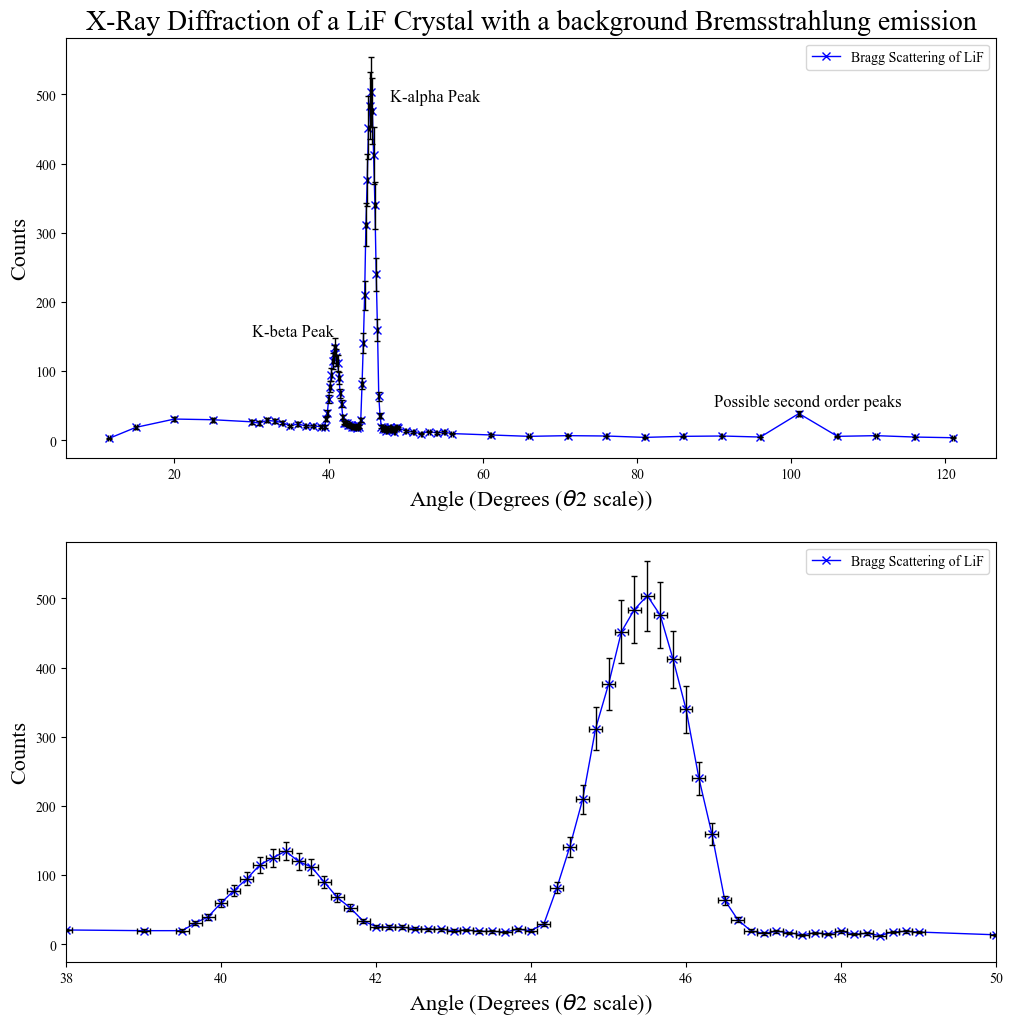

In [3]:
#import data for LiF and convert to radians then plot data with error bars and limiting to the peaks
angle  = np.loadtxt('xray_data_LiF.txt', usecols=0, delimiter=',')
counts = np.loadtxt('xray_data_LiF.txt', usecols=1, delimiter=',')
rad = angle * np.pi / 180

sorted_angle = np.sort(angle)
sorted_counts = ([counts[np.where(angle == i)] for i in sorted_angle])
flat_counts = [item for sublist in sorted_counts for item in sublist]
angle_error = np.ones(len(angle)) * 1/12
count_error = np.ones(len(counts)) * counts/10

plt.figure(figsize = (12,12))
plt.subplot(2,1,1)
plt.plot(sorted_angle, sorted_counts, marker = 'x',color = 'blue', linewidth = 1,label='Bragg Scattering of LiF')
plt.xlabel(r'Angle (Degrees ($\theta$2 scale))', fontsize=axis_size)
plt.errorbar(angle, counts, xerr=angle_error, yerr=count_error, fmt='none', ecolor='black', elinewidth=1, capsize=2)
plt.ylabel('Counts', fontsize=axis_size)
plt.title('X-Ray Diffraction of a LiF Crystal with a background Bremsstrahlung emission', fontsize=title_size)
plt.annotate('K-beta Peak', xy=(30, 150), fontsize=annotate_size)
plt.annotate('K-alpha Peak', xy=(48, 490), fontsize=annotate_size)
plt.annotate('Possible second order peaks', xy=(90, 50), fontsize=annotate_size)
plt.legend()

plt.subplot(2,1,2)
plt.plot(sorted_angle, sorted_counts, marker = 'x',color = 'blue', linewidth = 1,label='Bragg Scattering of LiF')
plt.xlabel(r'Angle (Degrees ($\theta$2 scale))', fontsize=axis_size)
plt.errorbar(angle, counts, xerr=angle_error, yerr=count_error, fmt='none', ecolor='black', elinewidth=1, capsize=2)
plt.xlim(38,50)
plt.ylabel('Counts', fontsize=axis_size)
plt.legend()

plt.show()


In [4]:
# calculate peaks using scipy define functions to calculate wavelength and energy print the angle where peaks occur and corresponding wavelength and energy
peaks_indexes,peaks = sp.signal.find_peaks(flat_counts, height=100, distance=10)
def wavelength(d, theta,m):
    return ((2*d*np.sin(theta/2))/m)*10**(-2)
def energy(wavelength):
    return (const.h*const.c/wavelength)/const.e
m=1
angle = (sorted_angle[peaks_indexes])
rad = (angle) * np.pi / 180


k_beta = wavelength(d,rad[0],m)
k_alpha = wavelength(d,rad[1],m)

print(f'The peaks for the K-alpha and K-beta lines are at {angle[0]:3.2f} and {angle[1]:3.2f} degrees respectively')
print(f'The Wavelength of the K-alpha line is {wavelength(d,rad[0],m):4.4g} m, and K-beta line is {wavelength(d,rad[1],m):4.4g} m')
print(f'The Energy of the K-alpha line is {energy(wavelength(d,rad[0],m)):3.3g} eV, and K-beta line is {energy(wavelength(d,rad[1],m)):3.3g} eV')

The peaks for the K-alpha and K-beta lines are at 40.83 and 45.50 degrees respectively
The Wavelength of the K-alpha line is 1.405e-10 m, and K-beta line is 1.557e-10 m
The Energy of the K-alpha line is 8.83e+03 eV, and K-beta line is 7.96e+03 eV


To calculate the location of this peak the scipy function find_peaks was used as this is an automatic way for python to find the index of the peak. Then by defining functions for the wavelength and energy of the radiation these values could alos be automated. By defining functions we ensure that the code doesn't need to be rewritten for each peak.
To further increase the precision of this data the location of the true peak could be found by fitting a guassian curve to the data using the scipy function curve_fit. This would improve the value as it wouldn't be limited to the increment values for where the peak could occur. However, this wasn't done as there was not enough time to complete this task (this method also follows throughout as it could be used on the graphs below but once again there wasn't enough time\). 

## Measuring the interatomic spacing of 2 crystals (KCl and NaCl) using the previously measured wavelengths of the K-alpha and K-beta lines of X-rays

In this task we will use the same method as used of the LiF crystal where counts will be taken across all angles but with a more dense form around the regions of interest (where the first and second order peaks occur) as this will reduce the uncertainty on the peak position of the curve. After defining a function to calculate the interatomic spacing of the crystal the curve of both crystals will be plotted with graphs showing a closer look at the peaks. And the interatomic spacings can be calculated and displayed in the table below.
Uncertainties on the angle of the peaks were calculated to be 1/2 of the smallest scale which is 1/6th of a degree giving an uncertainty on each angle of 1/12th a degree. As for uncertainties on the counts it was not as simple as a flat number would result in a massive uncertainty on the smaller counts and a very small uncertainty on the larger values. Therefore the uncertainty on the counts must be dependent on the counts and thus was given a value of 1/10th the count it corresponds to.
The second order peaks should be expected to be observed at about twice the angle then the first order peaks.

### Graphs and results for KCl

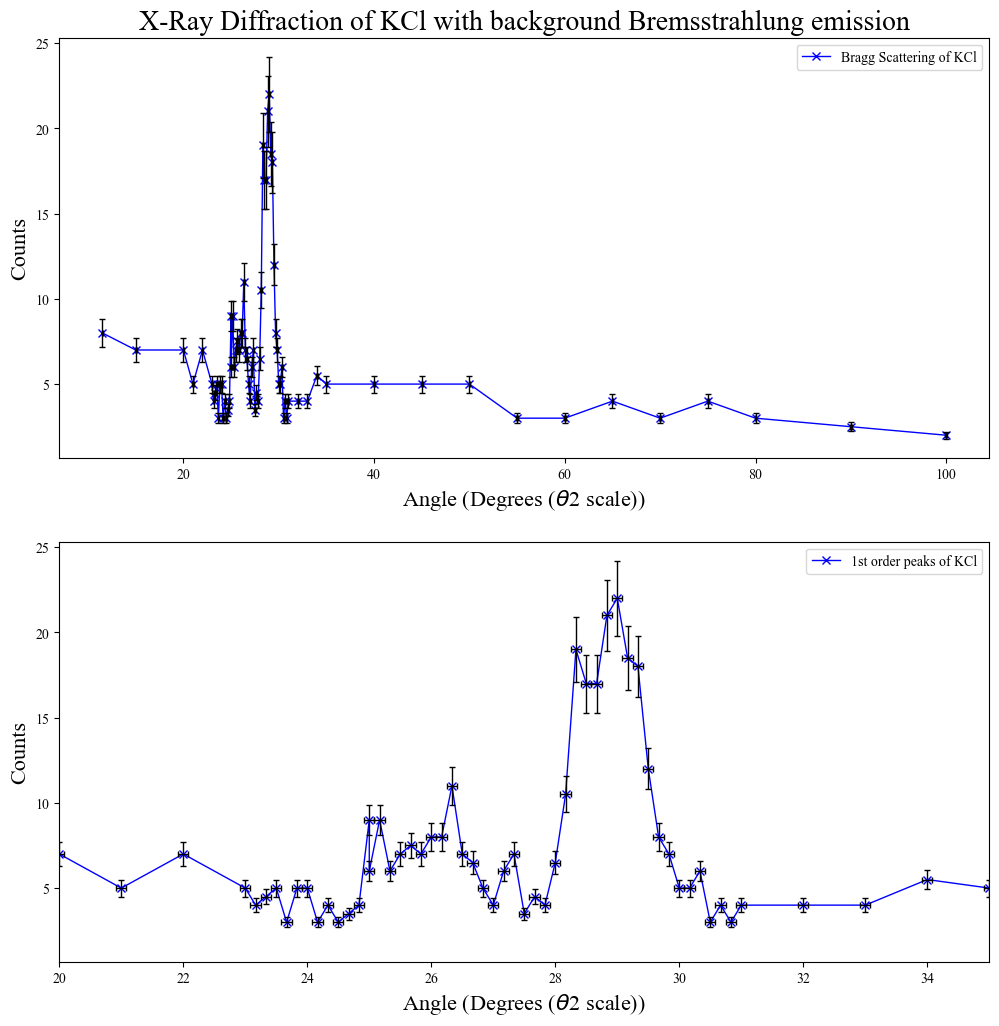

In [5]:
# load data for KCl and plot data with error bars and limiting to the peaks
angle  = np.loadtxt('xray_data_KCl.txt', usecols=0, delimiter=',')
counts = np.loadtxt('xray_data_KCl.txt', usecols=1, delimiter=',')
rad = angle * np.pi / 180

sorted_angle = np.sort(angle)
sorted_counts = ([counts[np.where(angle == i)] for i in sorted_angle])
flat_counts = [item for sublist in sorted_counts for item in sublist]
flat_counts = (flat_counts[:70])

angle_error = np.ones(len(angle)) * 1/12
count_error = np.ones(len(counts)) * flat_counts/10

plt.figure(figsize = (12,12))
plt.subplot(2,1,1)
plt.plot(sorted_angle, flat_counts, marker = 'x',color = 'blue', linewidth = 1,label='Bragg Scattering of KCl')
plt.xlabel(r'Angle (Degrees ($\theta$2 scale))', fontsize=axis_size)
plt.errorbar(sorted_angle, flat_counts, xerr=angle_error, yerr=count_error, fmt='none', ecolor='black', elinewidth=1, capsize=2)
plt.ylabel('Counts', fontsize=axis_size)
plt.title('X-Ray Diffraction of KCl with background Bremsstrahlung emission', fontsize=title_size)
plt.legend()

plt.subplot(2,1,2)
plt.plot(sorted_angle, flat_counts, marker = 'x',color = 'blue', linewidth = 1,label='1st order peaks of KCl')
plt.xlabel(r'Angle (Degrees ($\theta$2 scale))', fontsize=axis_size)
plt.errorbar(sorted_angle, flat_counts, xerr=angle_error, yerr=count_error, fmt='none', ecolor='black', elinewidth=1, capsize=2)
plt.xlim(20,35)
plt.ylabel('Counts', fontsize=axis_size)
plt.legend()

plt.show()

In [6]:
# define a function to calculate lattice constant and calculate lattice constant and interplanar spacing for KCl
def lat_const(theta,m,wavelength):
    return 2*(m*wavelength)/(2*np.sin(theta/2))

peaks_indexes,peaks = sp.signal.find_peaks(flat_counts, height=10, distance=10)
m= (1,2)
angle = (sorted_angle[peaks_indexes])
rad = (angle) * np.pi / 180

a_beta = lat_const(rad[0],m[0],k_beta)
a_alpha = lat_const(rad[1],m[0],k_alpha)

angle = np.around(angle,2)
lat_con = ([a_beta,a_alpha])
inter_spacing = np.around([a_beta/2,a_alpha/2],decimals = 12),

print(f'The first order peaks for the K-alpha and K-beta lines are at {angle[0]} and {angle[1]} degrees respectively')
print(f'The Lattice Constant as calculated from the first order peaks for the K-alpha line is {lat_const(rad[0],m[0],k_beta):3.3g} m, and K-beta line is {lat_const(rad[1],m[0],k_alpha):3.3g} m')
print(f'The Interatomic Spacing as calculated from the first order peaks for the K-alpha line is {lat_const(rad[0],m[0],k_beta)/2:3.3g} m, and K-beta line is {lat_const(rad[1],m[0],k_alpha)/2:3.3g} m')

The first order peaks for the K-alpha and K-beta lines are at 26.33 and 29.0 degrees respectively
The Lattice Constant as calculated from the first order peaks for the K-alpha line is 6.17e-10 m, and K-beta line is 6.22e-10 m
The Interatomic Spacing as calculated from the first order peaks for the K-alpha line is 3.08e-10 m, and K-beta line is 3.11e-10 m


### Graphs and results for NaCl

These graphs and results were calculated following the same method as described for KCl.


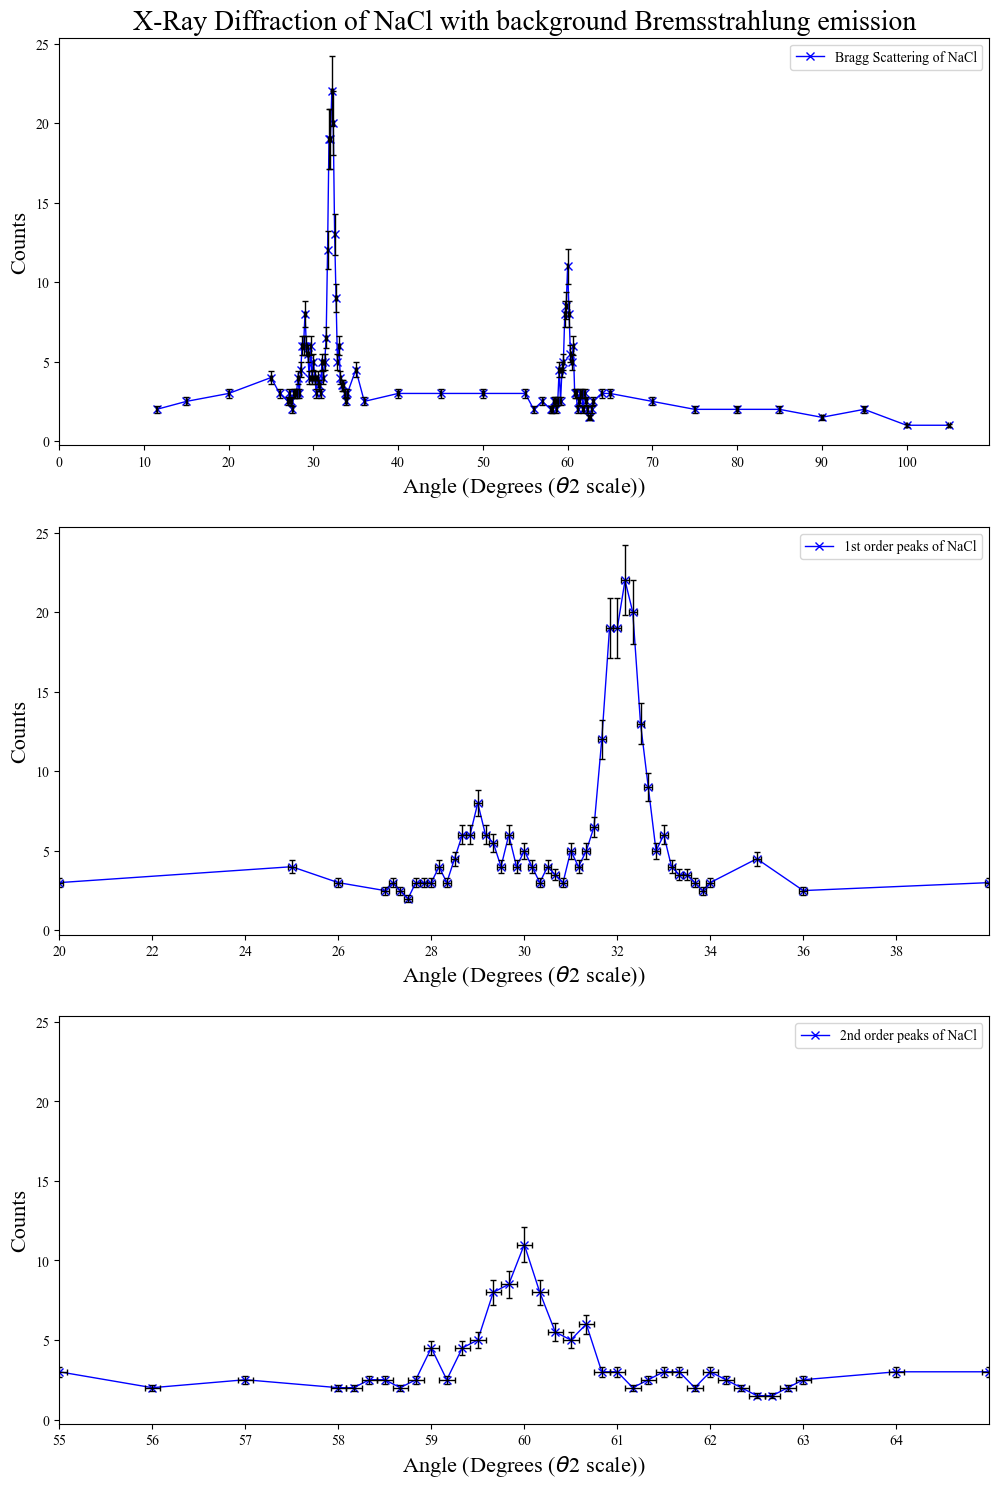

In [7]:
#load data for NaCl and plot data with error bars and limiting to the peaks
angle  = np.loadtxt('xray_data_NaCl.txt', usecols=0, delimiter=',')
counts = np.loadtxt('xray_data_NaCl.txt', usecols=1, delimiter=',')
rad = angle * np.pi / 180

sorted_angle = np.sort(angle)
sorted_counts = ([counts[np.where(angle == i)] for i in sorted_angle])
flat_counts = [item for sublist in sorted_counts for item in sublist]


angle_error = np.ones(len(angle)) * 1/12
count_error = np.ones(len(counts)) * flat_counts/10


plt.figure(figsize = (12,18))
plt.subplot(3,1,1)
plt.plot(sorted_angle, flat_counts, marker = 'x',color = 'blue', linewidth = 1,label='Bragg Scattering of NaCl')
plt.xlabel(r'Angle (Degrees ($\theta$2 scale))', fontsize=axis_size)
plt.errorbar(sorted_angle, flat_counts, xerr=angle_error, yerr=count_error, fmt='none', ecolor='black', elinewidth=1, capsize=2)
plt.xticks(np.arange(0,110,10))
plt.ylabel('Counts', fontsize=axis_size)
plt.title('X-Ray Diffraction of NaCl with background Bremsstrahlung emission', fontsize=title_size)
plt.legend()

plt.subplot(3,1,2)
plt.plot(sorted_angle, flat_counts, marker = 'x',color = 'blue', linewidth = 1,label='1st order peaks of NaCl')
plt.xlabel(r'Angle (Degrees ($\theta$2 scale))', fontsize=axis_size)
plt.errorbar(sorted_angle, flat_counts, xerr=angle_error, yerr=count_error, fmt='none', ecolor='black', elinewidth=1, capsize=2)
plt.xlim(20,40)
plt.xticks(np.arange(20,40,2))
plt.ylabel('Counts', fontsize=axis_size)
plt.legend()

plt.subplot(3,1,3)
plt.plot(sorted_angle, flat_counts, marker = 'x',color = 'blue', linewidth = 1,label='2nd order peaks of NaCl')
plt.xlabel(r'Angle (Degrees ($\theta$2 scale))', fontsize=axis_size)
plt.errorbar(sorted_angle, flat_counts, xerr=angle_error, yerr=count_error, fmt='none', ecolor='black', elinewidth=1, capsize=2)
plt.xlim(55,65)
plt.xticks(np.arange(55,65,1))
plt.ylabel('Counts', fontsize=axis_size)
plt.legend()

plt.show()

In [8]:
# calculate lattice constant and interplanar spacing for NaCl from 1st order peaks
peaks_indexes,peaks = sp.signal.find_peaks(flat_counts, height=8, distance=10)
m=1
angle1 = (sorted_angle[peaks_indexes])
rad = (angle1) * np.pi / 180

a_beta = lat_const(rad[0],m,k_beta)
a_alpha = lat_const(rad[1],m,k_alpha)

angle1 = np.around(angle1,2)
lat_con = ([a_beta,a_alpha])
inter_spacing = np.around([a_beta/2,a_alpha/2],decimals = 12)

print(f'The first order peaks for the K-alpha and K-beta lines are at {angle1[0]} and {angle1[1]} degrees respectively')
print(f'The Lattice Constant as calculated from the first order peaks for the K-alpha line is {lat_const(rad[0],m,k_beta):3.3g} m, and K-beta line is {lat_const(rad[1],m,k_alpha):3.3g} m')
print(f'The Interatomic Spacing as calculated from the first order peaks for the K-alpha line is {lat_const(rad[0],m,k_beta)/2:3.3g} m, and K-beta line is {lat_const(rad[1],m,k_alpha)/2:3.3g} m')


The first order peaks for the K-alpha and K-beta lines are at 29.0 and 32.17 degrees respectively
The Lattice Constant as calculated from the first order peaks for the K-alpha line is 5.61e-10 m, and K-beta line is 5.62e-10 m
The Interatomic Spacing as calculated from the first order peaks for the K-alpha line is 2.8e-10 m, and K-beta line is 2.81e-10 m


In [9]:
# calculate lattice constant and interplanar spacing for NaCl from 2nd order peaks
lim2_angle = sorted_angle[60:]
lim2_counts = flat_counts[60:]
peaks_indexes,peaks = sp.signal.find_peaks(lim2_counts, height=4, distance=5)
m=2
angle = (lim2_angle[peaks_indexes])
rad = (angle) * np.pi / 180

a_beta = lat_const(rad[0],m,k_beta)
a_alpha = lat_const(rad[1],m,k_alpha)

angle = np.around(angle,2)
lat_con = ([a_beta,a_alpha])
inter_spacing = np.around([a_beta/2,a_alpha/2],decimals = 12)

print(f'The second order peaks for the K-alpha and K-beta lines are at {angle[0]} and {angle[1]} degrees respectively')
print(f'The Lattice Constant as calculated from the second order peaks for the K-alpha line is {lat_const(rad[0],m,k_beta):3.3g} m, and K-beta line is {lat_const(rad[1],m,k_alpha):3.3g} m')
print(f'The Interatomic Spacing as calculated from the second order peaks for the K-alpha line is {lat_const(rad[0],m,k_beta)/2:3.3g} m, and K-beta line is {lat_const(rad[1],m,k_alpha)/2:3.3g} m')


The second order peaks for the K-alpha and K-beta lines are at 59.0 and 60.0 degrees respectively
The Lattice Constant as calculated from the second order peaks for the K-alpha line is 5.7e-10 m, and K-beta line is 6.23e-10 m
The Interatomic Spacing as calculated from the second order peaks for the K-alpha line is 2.85e-10 m, and K-beta line is 3.11e-10 m


## Conclusion

From the results obtained in the first part of this experiment it was found that the wavelength of the K-alpha line of X-rays was 1.557e-10m and for K-beta it was 1.405e-10m. These values were then used to calculate the interatomic spacing of the crsystals KCl and NaCl. The results are shown below.

|                          | KCl (K-alpha)| NaCl (K-alpha)| KCl (K-beta)| NaCl (K-beta)|
|:------------------------:|:------------:|:-------------:|:-----------:|:------------:|
| Lattice Constant (m)     | 6.17e-10     | 5.61e-10      | 6.22e-10    | 5.62e-10     |
| Interatomic Spacing (m)  | 3.08e-10     | 2.8e-10       | 3.11e-10    | 2.81e-10     |


These values when compared to the expected values are within the range of expected uncertainty and also predict the correct locations of the second order peaks which as seen above also provide reasonable estimates for the lattice constant and interatomic spacing.

However the uncertainty on the values when calculated from the second order peaks is greater, as the number of counts is much lower for these peaks, resulting in more ambiguity as to where the peaks occur.
